#**Project Title:Retail Order Data Analysis**
#**Domain:Data Analytics**

In [ ]:
# ''' Problem Statement:
#         ●Objective: To analyze and optimize sales performance
#         by identifying key trends, top-performing products, and
#         growth opportunities using a dataset of sales transactions.

#         ●Goals:
#             1.Identify products and categories contributing the most to revenue and profit.
#             2.Analyze year-over-year (YoY) and month-over-month (MoM) sales trends.
#             3.Highlight subcategories with the highest profit margins to guide decision-making.'''

#**Step 1: Data Extraction**

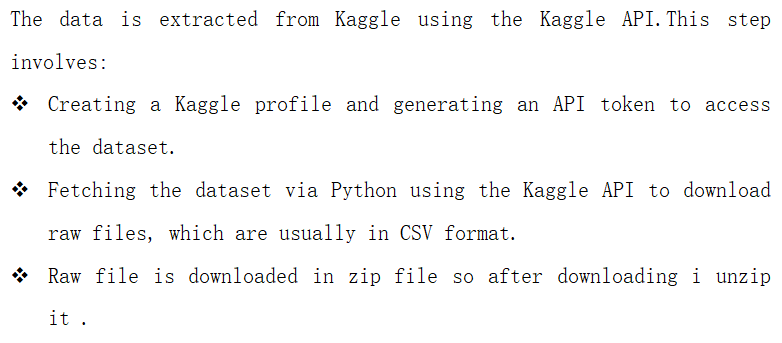

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle_API/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download ankitbansal06/retail-orders -f orders.csv

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0
  0% 0.00/200k [00:00<?, ?B/s]
100% 200k/200k [00:00<00:00, 85.9MB/s]


In [ ]:
! unzip orders.csv

Archive:  orders.csv.zip
  inflating: orders.csv              


In [ ]:
import pandas as pd
df = pd.read_csv('/content/orders.csv')

In [ ]:
df

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3


#**Step 2: Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          9994 non-null   int64  
 1   order_date        9994 non-null   object 
 2   ship_mode         9994 non-null   object 
 3   Segment           9994 non-null   object 
 4   Country           9994 non-null   object 
 5   City              9994 non-null   object 
 6   State             9994 non-null   object 
 7   postal_code       9994 non-null   int64  
 8   Region            9994 non-null   object 
 9   Category          9994 non-null   object 
 10  sub_category      9994 non-null   object 
 11  product_id        9994 non-null   object 
 12  cost_price        9994 non-null   int64  
 13  list_price        9994 non-null   int64  
 14  Quantity          9994 non-null   int64  
 15  discount_percent  9994 non-null   int64  
 16  Discount          9994 non-null   float64


In [ ]:
df.rename(columns={"Order Id": "order_id"}, inplace= True)

In [ ]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'Segment', 'Country', 'City',
       'State', 'postal_code', 'Region', 'Category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'Quantity',
       'discount_percent', 'Discount', 'sale_price', 'Profit'],
      dtype='object')

In [ ]:
df.columns = ['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent']

In [ ]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent'],
      dtype='object')

In [ ]:
df['order_date'] = pd.to_datetime(df["order_date"],format="%Y-%m-%d")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          9994 non-null   int64         
 1   order_date        9994 non-null   datetime64[ns]
 2   ship_mode         9993 non-null   object        
 3   Segment           9994 non-null   object        
 4   Country           9994 non-null   object        
 5   City              9994 non-null   object        
 6   State             9994 non-null   object        
 7   postal_code       9994 non-null   int64         
 8   Region            9994 non-null   object        
 9   Category          9994 non-null   object        
 10  sub_category      9994 non-null   object        
 11  product_id        9994 non-null   object        
 12  cost_price        9994 non-null   int64         
 13  list_price        9994 non-null   int64         
 14  Quantity          9994 n

In [ ]:
for i in df.select_dtypes(include=["object"]).columns:
  print(i,df[i].unique())

ship_mode ['Second Class' 'Standard Class' 'Not Available' 'unknown' 'First Class'
 nan 'Same Day']
Segment ['Consumer' 'Corporate' 'Home Office']
Country ['United States']
City ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Br

In [ ]:
df.isnull().sum()

,0
order_id,0
order_date,0
ship_mode,1
segment,0
country,0
city,0
state,0
postal_code,0
region,0
category,0


In [ ]:
df.fillna('unknown',inplace = True)

In [ ]:
df.isnull().sum()

,0
order_id,0
order_date,0
ship_mode,0
segment,0
country,0
city,0
state,0
postal_code,0
region,0
category,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9989,False
9990,False
9991,False
9992,False


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'State', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent', 'discount', 'sale_price', 'profit'],
      dtype='object')

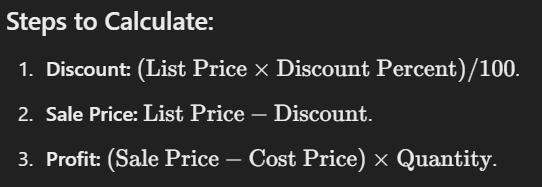

In [ ]:
df['discount'] = (df['list_price'] * df['discount_percent']) / 100
df['sale_price'] = df['list_price'] - df['discount']
df['profit'] = (df['sale_price'] - df['cost_price']) * df['quantity']

In [ ]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent', 'discount', 'sale_price', 'profit'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
order_id,0
order_date,0
ship_mode,0
segment,0
country,0
city,0
state,0
postal_code,0
region,0
category,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.to_csv('orders.csv',index=False)

#**Step 3: SQL Server Integration**

Once cleaned, the dataset is transferred to SQL Server for efficient querying

1. Orders Table Contains 'order_id', 'order_date', 'ship_mode', 'Segment', 'Country', 'City', 'State', 'postal_code', 'Region','Discount','sale_price','Profit' and 'product_id.

product_id as a foriegn key in order table and order_id as a primary key in order table.

2. Products Table Contains 'product_id', 'Category', 'sub_category', 'cost_price', 'list_price', 'discount_percent'.

product_id as a primary key in products table.

A foreign key relationship linking the two tables.

In [ ]:
orders = df[['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
                   'state', 'postal_code', 'region','discount','sale_price','profit','quantity']].drop_duplicates()
products = df[['product_id', 'category', 'sub_category', 'cost_price', 'list_price',
                     'discount_percent']].drop_duplicates()

In [ ]:
orders = pd.merge(orders, df[['order_id', 'product_id']], on='order_id')

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     9994 non-null   int64         
 1   order_date   9994 non-null   datetime64[ns]
 2   ship_mode    9994 non-null   object        
 3   Segment      9994 non-null   object        
 4   Country      9994 non-null   object        
 5   City         9994 non-null   object        
 6   State        9994 non-null   object        
 7   postal_code  9994 non-null   int64         
 8   Region       9994 non-null   object        
 9   Discount     9994 non-null   float64       
 10  sale_price   9994 non-null   float64       
 11  Profit       9994 non-null   float64       
 12  product_id   9994 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1015.1+ KB


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9180 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        9180 non-null   object
 1   Category          9180 non-null   object
 2   sub_category      9180 non-null   object
 3   cost_price        9180 non-null   int64 
 4   list_price        9180 non-null   int64 
 5   discount_percent  9180 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 502.0+ KB


In [ ]:
!pip install psycopg2-binary sqlalchemy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.6 MB/s eta 0:00:00


In [ ]:
from sqlalchemy import create_engine

In [ ]:
host = 'miniprojectdb.cv8yqowiopcb.ap-south-1.rds.amazonaws.com'
port = '5432'
database = 'postgres'
user = 'postgres'
password = 'dhoni00728'

In [ ]:
connection_string = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_string)

In [ ]:
tables = {'orders': orders, 'products': products}

In [ ]:
for table_name, table_df in tables.items():
    table_df.to_sql(table_name, engine, if_exists='replace', index=False)

print("Tables pushed to PostgreSQL successfully.")

Tables pushed to PostgreSQL successfully.


In [ ]:
with engine.connect() as connection:
    print("Connection successful!")

Connection successful!


In [ ]:
query = "SELECT * FROM orders;"
df1 = pd.read_sql(query, con=engine)
print(df1.head())

   order_id order_date       ship_mode    segment        country  \
0         1 2023-03-01    Second Class   Consumer  United States   
1         2 2023-08-15    Second Class   Consumer  United States   
2         3 2023-01-10    Second Class  Corporate  United States   
3         4 2022-06-18  Standard Class   Consumer  United States   
4         5 2022-07-13  Standard Class   Consumer  United States   

              city       state  postal_code region  discount  sale_price  \
0        Henderson    Kentucky        42420  South       5.2       254.8   
1        Henderson    Kentucky        42420  South      21.9       708.1   
2      Los Angeles  California        90036   West       0.5         9.5   
3  Fort Lauderdale     Florida        33311  South      19.2       940.8   
4  Fort Lauderdale     Florida        33311  South       1.0        19.0   

   profit  quantity       product_id  
0    29.6         2  FUR-BO-10001798  
1   324.3         3  FUR-CH-10000454  
2    -1.0        

In [ ]:
query = "SELECT * FROM products;"
df1 = pd.read_sql(query, con=engine)
print(df1.head())

        product_id         category sub_category  cost_price  list_price  \
0  FUR-BO-10001798        Furniture    Bookcases         240         260   
1  FUR-CH-10000454        Furniture       Chairs         600         730   
2  OFF-LA-10000240  Office Supplies       Labels          10          10   
3  FUR-TA-10000577        Furniture       Tables         780         960   
4  OFF-ST-10000760  Office Supplies      Storage          20          20   

   discount_percent  
0                 2  
1                 3  
2                 5  
3                 2  
4                 5  


#**Business Insights through SQL Queries:**

●Top-Selling Products: Identify the products that generate the highest revenue based on sale prices.

In [ ]:
query = "SELECT p.product_id, p.category,p.sub_category,SUM(o.sale_price * o.quantity) AS total_revenue FROM orders o JOIN products p ON o.product_id = p.product_id GROUP BY p.product_id, p.category,p.sub_category ORDER BY total_revenue DESC LIMIT 10;"


In [ ]:
df1 = pd.read_sql(query, con=engine)
print(df1)

        product_id         category sub_category  total_revenue
0  OFF-BI-10000545  Office Supplies      Binders      1473999.3
1  TEC-AC-10003832       Technology  Accessories      1313960.4
2  TEC-CO-10004722       Technology      Copiers      1225280.0
3  OFF-BI-10003527  Office Supplies      Binders       970829.0
4  FUR-CH-10002024        Furniture       Chairs       960725.6
5  FUR-TA-10003473        Furniture       Tables       912258.0
6  TEC-AC-10002049       Technology  Accessories       863364.0
7  TEC-CO-10001449       Technology      Copiers       859104.0
8  FUR-BO-10002213        Furniture    Bookcases       840148.0
9  OFF-BI-10001359  Office Supplies      Binders       784910.5


●Monthly Sales Analysis: Compare year-over-year sales to identify growth or decline in certain months.

In [ ]:
query = "SELECT DATE_PART('year', CAST(o.order_date AS DATE)) AS year, DATE_PART('month', CAST(o.order_date AS DATE)) AS month, SUM(o.sale_price * o.quantity) AS monthly_revenue FROM orders o GROUP BY DATE_PART('year', CAST(o.order_date AS DATE)), DATE_PART('month', CAST(o.order_date AS DATE)) ORDER BY year, month;"

In [ ]:
df1 = pd.read_sql(query, con=engine)
print(df1)

      year  month  monthly_revenue
0   2022.0    1.0         437431.3
1   2022.0    2.0         444011.1
2   2022.0    3.0         394105.2
3   2022.0    4.0         476400.9
4   2022.0    5.0         413625.5
5   2022.0    6.0         465300.3
6   2022.0    7.0         375278.4
7   2022.0    8.0         534562.4
8   2022.0    9.0         433887.0
9   2022.0   10.0         601707.8
10  2022.0   11.0         451809.6
11  2022.0   12.0         447421.8
12  2023.0    1.0         434765.5
13  2023.0    2.0         731638.8
14  2023.0    3.0         393051.9
15  2023.0    4.0         543231.5
16  2023.0    5.0         410707.9
17  2023.0    6.0         328939.0
18  2023.0    7.0         422533.7
19  2023.0    8.0         465010.3
20  2023.0    9.0         420620.5
21  2023.0   10.0         626498.3
22  2023.0   11.0         334940.6
23  2023.0   12.0         491848.9


Product Performance: Use functions like GROUP BY, HAVING, ROW_NUMBER(), and CASE WHEN to categorize and rank products by their revenue, profit margin, etc.

In [ ]:
query = "WITH ProductPerformance AS ( SELECT p.product_id, p.category,p.sub_category,SUM(o.sale_price * o.quantity) AS total_revenue, AVG(CASE WHEN p.cost_price = 0 THEN 0 ELSE (o.sale_price - p.cost_price) / p.cost_price END) AS profit_margin FROM orders o JOIN  products p ON  o.product_id = p.product_id GROUP BY p.product_id, p.category,p.sub_category ) SELECT product_id,category,sub_category total_revenue, profit_margin, ROW_NUMBER() OVER (ORDER BY total_revenue DESC) AS revenue_rank FROM ProductPerformance;"



In [ ]:
df1 = pd.read_sql(query, con=engine)
print(df1)

           product_id         category total_revenue  profit_margin  \
0     OFF-BI-10000545  Office Supplies       Binders       1.141582   
1     TEC-AC-10003832       Technology   Accessories       2.994209   
2     TEC-CO-10004722       Technology       Copiers       0.167295   
3     OFF-BI-10003527  Office Supplies       Binders       0.720217   
4     FUR-CH-10002024        Furniture        Chairs       0.442050   
...               ...              ...           ...            ...   
1857  OFF-FA-10000490  Office Supplies     Fasteners       0.000000   
1858  OFF-FA-10001754  Office Supplies     Fasteners       0.000000   
1859  OFF-AP-10002906  Office Supplies    Appliances       0.000000   
1860  OFF-BI-10000494  Office Supplies       Binders       0.000000   
1861  TEC-AC-10003433       Technology   Accessories       0.000000   

      revenue_rank  
0                1  
1                2  
2                3  
3                4  
4                5  
...            ...  


●Regional Sales Analysis: Query sales data by region to identify which areas are performing best.

In [ ]:
query = "SELECT o.region, SUM(o.sale_price * o.quantity) AS regional_revenue, COUNT(DISTINCT o.order_id) AS total_orders FROM orders o GROUP BY o.region ORDER BY regional_revenue DESC;"

In [ ]:
df1 = pd.read_sql(query, con=engine)
print(df1)

    region  regional_revenue  total_orders
0     West         3467409.6          3203
1     East         3257983.8          2848
2  Central         2387881.2          2323
3    South         1966053.6          1620


●Discount Analysis: Identify products with discounts greater than 20% and calculate the impact of discounts on sales.

In [ ]:
df['discount_percent'].unique()

array([2, 3, 5, 4])

In [ ]:
df['discount'].unique()

array([5.200e+00, 2.190e+01, 5.000e-01, 1.920e+01, 1.000e+00, 1.500e+00,
       3.000e-01, 4.550e+01, 4.000e-01, 3.300e+00, 5.130e+01, 2.730e+01,
       6.000e-01, 8.200e+00, 3.500e+00, 0.000e+00, 2.010e+01, 2.400e+00,
       6.300e+00, 8.000e-01, 1.800e+00, 2.800e+00, 5.200e+01, 2.700e+00,
       9.240e+01, 4.800e+00, 3.600e+00, 9.000e-01, 5.500e+01, 7.600e+00,
       2.200e+00, 1.060e+01, 4.200e+00, 1.850e+01, 4.500e+00, 4.000e+00,
       8.400e+00, 2.500e+00, 1.600e+00, 3.200e+00, 4.120e+01, 1.050e+01,
       6.400e+00, 7.500e+00, 3.330e+01, 5.100e+00, 1.660e+01, 3.000e+00,
       1.400e+00, 6.000e+00, 4.600e+00, 1.500e+01, 8.000e+00, 2.000e-01,
       5.000e+00, 2.000e+00, 7.200e+00, 6.800e+00, 6.500e+00, 3.160e+01,
       1.800e+01, 2.480e+01, 9.600e+00, 7.000e+00, 1.680e+01, 1.520e+01,
       5.850e+01, 4.400e+00, 9.200e+00, 4.700e+01, 1.200e+00, 3.264e+02,
       1.120e+01, 6.960e+01, 2.000e+01, 1.230e+01, 2.500e+01, 5.400e+00,
       2.700e+01, 1.260e+01, 6.600e+00, 1.320e+01, 

In [ ]:
query = "SELECT p.product_id, p.category,p.sub_category,p.discount_percent,SUM(o.sale_price * o.quantity) AS total_revenue_after_discount,SUM(p.list_price * o.quantity) AS total_revenue_before_discount,(SUM(p.list_price * o.quantity) - SUM(o.sale_price * o.quantity)) AS discount_impact FROM orders o JOIN products p ON o.product_id = p.product_id WHERE p.discount_percent > 20 GROUP BY p.product_id, p.category,p.sub_category,p.discount_percent ORDER BY discount_impact DESC;"

In [ ]:
df1 = pd.read_sql(query, con=engine)
print(df1)

Empty DataFrame
Columns: [product_id, category, sub_category, discount_percent, total_revenue_after_discount, total_revenue_before_discount, discount_impact]
Index: []


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
discount_analysis = df.groupby('discount_percent')['discount'].agg(['mean', 'median', 'count']).reset_index()

First Plot - Frequency of Discount Percentages

This bar plot visualizes the frequency (or count) of various discount percentages.

The discount_analysis dataset should contain columns like discount_percent and count, representing each discount percentage and how often it occurs.

The plot helps identify which discount percentages are most or least frequently applied.

<ipython-input-37-35c228e506ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_analysis, x='discount_percent', y='count', palette='viridis')


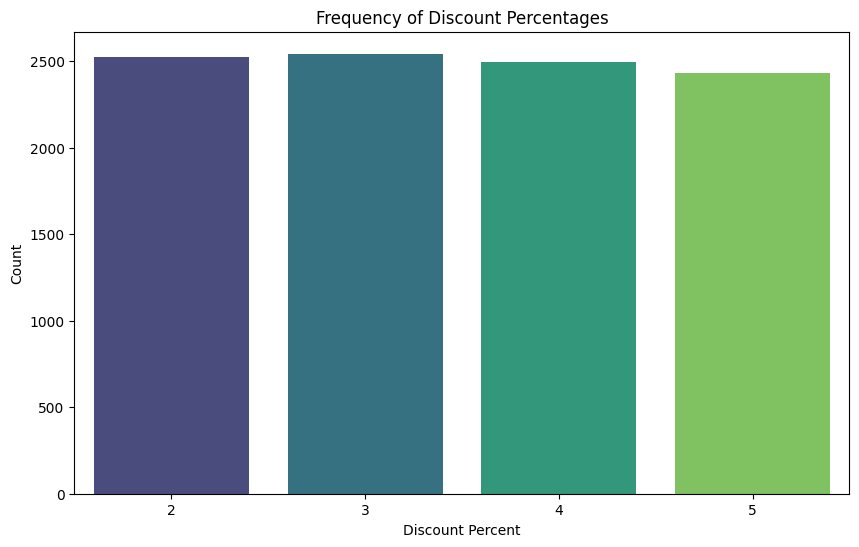

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=discount_analysis, x='discount_percent', y='count', palette='viridis')
plt.title('Frequency of Discount Percentages')
plt.xlabel('Discount Percent')
plt.ylabel('Count')
plt.show()

Second Plot - Distribution of Discounts by Discount Percent

This box plot examines the distribution of actual discount amounts (discount) across different discount percentage categories (discount_percent).

The dataset df must include both discount_percent and discount columns.

It shows the spread (range), median, and outliers of discounts for each percentage category, helping analyze the variation in discounts provided under each percentage.

<ipython-input-38-90a64bf1787f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='discount_percent', y='discount', palette='coolwarm')


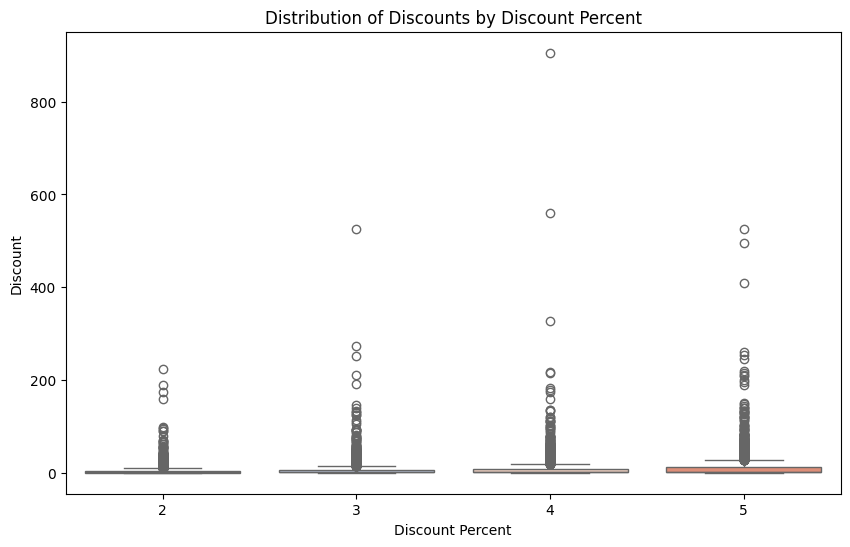

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='discount_percent', y='discount', palette='coolwarm')
plt.title('Distribution of Discounts by Discount Percent')
plt.xlabel('Discount Percent')
plt.ylabel('Discount')
plt.show()

#**10 SQL query Question From Guvi**

In [ ]:
# Find top 10 highest revenue generating products

query = "SELECT p.product_id, p.category, p.sub_category,SUM(o.sale_price * o.quantity) AS total_revenue FROM orders o JOIN products p ON o.product_id = p.product_id GROUP BY p.product_id, p.category,p.sub_category ORDER BY total_revenue DESC LIMIT 10;"
df1 = pd.read_sql(query, con=engine)
print(df1)

        product_id         category sub_category  total_revenue
0  OFF-BI-10000545  Office Supplies      Binders      1473999.3
1  TEC-AC-10003832       Technology  Accessories      1313960.4
2  TEC-CO-10004722       Technology      Copiers      1225280.0
3  OFF-BI-10003527  Office Supplies      Binders       970829.0
4  FUR-CH-10002024        Furniture       Chairs       960725.6
5  FUR-TA-10003473        Furniture       Tables       912258.0
6  TEC-AC-10002049       Technology  Accessories       863364.0
7  TEC-CO-10001449       Technology      Copiers       859104.0
8  FUR-BO-10002213        Furniture    Bookcases       840148.0
9  OFF-BI-10001359  Office Supplies      Binders       784910.5


In [ ]:
# Find the top 5 cities with the highest profit margins
query = "SELECT city,CASE WHEN SUM(sale_price * quantity) = 0 THEN 0  ELSE SUM(profit) / SUM(sale_price * quantity) * 100 END AS profit_margin FROM orders GROUP BY city ORDER BY profit_margin DESC LIMIT 5;"
df1 = pd.read_sql(query, con=engine)
print(df1)

        city  profit_margin
0  Goldsboro      29.824561
1    Danbury      29.824561
2    Bozeman      25.023430
3     Rogers      23.469388
4  Owensboro      22.865014


In [ ]:
# Calculate the total discount given for each category
query = "SELECT p.category,SUM(o.discount) AS total_discount  FROM orders o JOIN products p ON o.product_id = p.product_id GROUP BY p.category;"
df1 = pd.read_sql(query, con=engine)
print(df1)

          category  total_discount
0        Furniture        181387.1
1  Office Supplies        173149.6
2       Technology        155703.9


In [ ]:
# Find the average sale price per product category
query = "SELECT p.category,AVG(o.sale_price) AS average_sale_price  FROM orders o JOIN products p ON o.product_id = p.product_id GROUP BY p.category;"
df1 = pd.read_sql(query, con=engine)
print(df1)

          category  average_sale_price
0        Furniture          360.262287
1  Office Supplies          134.233726
2       Technology          393.834726


In [ ]:
# Find the region with the highest average sale price
query = "SELECT region ,AVG(sale_price) AS average_sale_price  FROM orders GROUP BY region ORDER BY average_sale_price DESC LIMIT 1;"
df1 = pd.read_sql(query, con=engine)
print(df1)

  region  average_sale_price
0  South          233.340432


In [ ]:
# Find the total profit per category
query = "SELECT p.category,SUM(o.profit) AS total_profit FROM orders o JOIN products p ON o.product_id = p.product_id GROUP BY p.category;"
df1 = pd.read_sql(query, con=engine)
print(df1)


          category  total_profit
0        Furniture     2389995.0
1  Office Supplies     2241329.5
2       Technology     2004802.4


In [ ]:
# Identify the top 3 segments with the highest quantity of orders
query = "SELECT segment,SUM(quantity) AS total_quantity FROM orders GROUP BY segment ORDER BY total_quantity DESC LIMIT 3;"
df1 = pd.read_sql(query, con=engine)
print(df1)

       segment  total_quantity
0     Consumer         19521.0
1    Corporate         11608.0
2  Home Office          6744.0


In [ ]:
# Determine the average discount percentage given per region
query = "SELECT o.region,AVG(p.discount_percent) AS average_discount_percentage FROM orders o JOIN products p ON o.product_id = p.product_id GROUP BY o.region;"
df1 = pd.read_sql(query, con=engine)
print(df1)

    region  average_discount_percentage
0    South                     3.473824
1     West                     3.487469
2     East                     3.484200
3  Central                     3.488194


In [ ]:
# Find the product category with the highest total profit

query = "SELECT p.category, SUM(o.profit) AS total_profit FROM orders o JOIN products p ON o.product_id = p.product_id GROUP BY p.category ORDER BY total_profit DESC LIMIT 1;"
df1 = pd.read_sql(query, con=engine)
print(df1)

    category  total_profit
0  Furniture     2389995.0


In [ ]:
# Calculate the total revenue generated per year
query = "SELECT DATE_PART('year', CAST(order_date AS DATE)) AS year, SUM(sale_price * quantity) AS total_revenue FROM orders GROUP BY DATE_PART('year', CAST(order_date AS DATE)) ORDER BY year;"
df1 = pd.read_sql(query, con=engine)
print(df1)

     year  total_revenue
0  2022.0      5475541.3
1  2023.0      5603786.9


#**10 SQL Query Question From Myside**

In [ ]:
#Identify the month with the highest sales revenue
query = "SELECT DATE_PART('month', CAST(order_date AS DATE)) AS month, SUM(sale_price * quantity) AS total_revenue FROM orders GROUP BY DATE_PART('month', CAST(order_date AS DATE)) ORDER BY total_revenue DESC LIMIT 1;"
df1 = pd.read_sql(query, con=engine)
print(df1)


   month  total_revenue
0   10.0      1228206.1


In [ ]:
#Find the average profit margin for each product category
query = "SELECT p.category, AVG(CASE WHEN (o.sale_price * o.quantity) = 0 THEN 0 ELSE (o.profit / (o.sale_price * o.quantity)) * 100 END) AS average_profit_margin FROM orders o JOIN products p ON o.product_id = p.product_id GROUP BY p.category;"
df1 = pd.read_sql(query, con=engine)
print(df1)

          category  average_profit_margin
0        Furniture               7.567163
1  Office Supplies               3.892847
2       Technology               8.461046


In [ ]:
#Calculate the percentage contribution of each region to total sales
query = "SELECT region,SUM(sale_price * quantity) / (SELECT SUM(sale_price * quantity) FROM orders) * 100 AS sales_percentage FROM orders GROUP BY region ORDER BY sales_percentage DESC;"
df1 = pd.read_sql(query, con=engine)
print(df1)

    region  sales_percentage
0     West         31.296208
1     East         29.405969
2  Central         21.552581
3    South         17.745242


In [ ]:
# Find the sub-category with the highest number of orders
query = "SELECT p.sub_category, SUM(o.quantity) AS total_quantity FROM orders o JOIN products p ON o.product_id = p.product_id GROUP BY p.sub_category ORDER BY total_quantity DESC LIMIT 1;"
df1 = pd.read_sql(query, con=engine)
print(df1)

  sub_category  total_quantity
0      Binders         41843.0


In [ ]:
# Determine the top 3 states with the highest discounts given
query = "SELECT state, SUM(discount) AS total_discount FROM orders GROUP BY state ORDER BY total_discount DESC LIMIT 3;"
df1 = pd.read_sql(query, con=engine)
print(df1)

        state  total_discount
0  California         15813.0
1    New York         11072.5
2       Texas          5983.1


In [ ]:
#Find the Top 3 Profitable Products by product_id and Category
query = "SELECT p.product_id, p.category,p.sub_category, SUM(o.profit) AS total_profit FROM orders o JOIN products p ON o.product_id = p.product_id GROUP BY p.product_id, p.category,p.sub_category ORDER BY total_profit DESC LIMIT 3;"
df1 = pd.read_sql(query, con=engine)
print(df1)

        product_id         category sub_category  total_profit
0  OFF-BI-10000545  Office Supplies      Binders      160809.3
1  OFF-BI-10003527  Office Supplies      Binders      127929.0
2  TEC-CO-10001449       Technology      Copiers      127584.0


In [ ]:
# Calculate the total number of orders per shipping mode
query = "SELECT ship_mode, COUNT(order_id) AS total_orders FROM orders GROUP BY ship_mode ORDER BY total_orders DESC;"
df1 = pd.read_sql(query, con=engine)
print(df1)

        ship_mode  total_orders
0  Standard Class          5962
1    Second Class          1945
2     First Class          1538
3        Same Day           543
4   Not Available             4
5         unknown             2


In [ ]:
# Find the customer segment with the highest average sale
query = "SELECT segment, AVG(sale_price) AS average_sale_price FROM orders GROUP BY segment ORDER BY average_sale_price DESC LIMIT 1;"
df1 = pd.read_sql(query, con=engine)
print(df1)

       segment  average_sale_price
0  Home Office          232.476164


In [ ]:
# Calculate the total profit generated per year
query = "SELECT DATE_PART('year', CAST(order_date AS DATE)) AS year, SUM(profit) AS total_profit FROM orders GROUP BY DATE_PART('year', CAST(order_date AS DATE)) ORDER BY year;"
df1 = pd.read_sql(query, con=engine)
print(df1)

     year  total_profit
0  2022.0      517071.3
1  2023.0      522856.9


In [ ]:
#  Identify the least profitable region
query = "SELECT region, SUM(profit) AS total_profit FROM orders GROUP BY region ORDER BY total_profit ASC LIMIT 1;"
df1 = pd.read_sql(query, con=engine)
print(df1)

  region  total_profit
0  South      202743.6
